# Mnist Number Prediction

Mnist-train.csv file contains images of numbers which are stored pixel by pixel in form of comma seperated pixel values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df=pd.read_csv("./mnist_train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [5]:
df=df.values

Now the first column contains the labels and rest of the columns in each row are pixel values

In [6]:
df.shape

(5000, 785)

Now the size is very large so we take only half of the values 

In [7]:
df=df[:2500]

In [8]:
df.shape

(2500, 785)

# Training and Testing dataset

In [9]:
split=(int)(0.8*df.shape[0])
x_train=df[:split,1:]
y_train=df[:split,0]

x_test=df[split:,1:]
y_test=df[split:,0]

In [10]:
print("Total data shape: ",df.shape)
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

Total data shape:  (2500, 785)
x_train shape:  (2000, 784)
y_train shape:  (2000,)
x_test shape:  (500, 784)
y_test shape:  (500,)


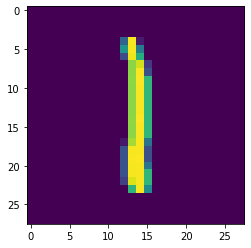

In [11]:
#Plotting a image from dataframe -> Here we plot 1000th image
#We reshape the image into 28x28 to make it clear and visible
img=x_train[1000].reshape(28,28)
plt.imshow(img)

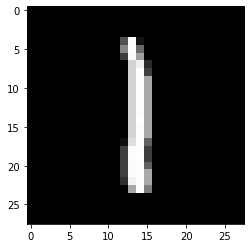

In [12]:
#To have a black and white image
plt.imshow(img,cmap='gray')

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
mnist_sk_knn=KNeighborsClassifier(n_neighbors=5)

In [15]:
mnist_sk_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
print(mnist_sk_knn.score(x_test,y_test))

0.926


The model is preety acurate in prediction of numbers.
Let's show how the predicted and real labels.

# KNN without sklearn

In [17]:
def KNN(x_train,y_train,tp,k):
    def distance(n1,n2):
        return np.sqrt(np.sum((n1-n2)**2))   
    dis=[]
    for i,j in zip(x_train,y_train):
        c=distance(i,tp)
        dis.append((j,c))
    dis=sorted(dis,key=lambda x:x[1])
    dis=np.array(dis)
    dis=dis[:k]
    uni=np.unique(dis[:,0],return_counts=True)
    l,cnt=uni
    answer=l[cnt.argmax()]    
    return((int)(answer))

To make it quick we just take 10 random images for testing

In [18]:
ten_x_test=x_test[210:220,:]
ten_y_test=y_test[210:220]

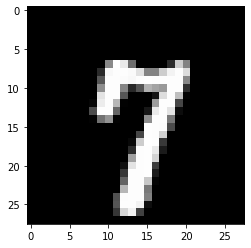

my predicted label 7
true label 7


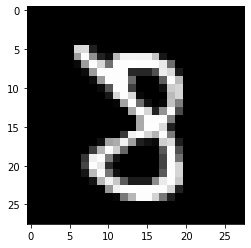

my predicted label 8
true label 8


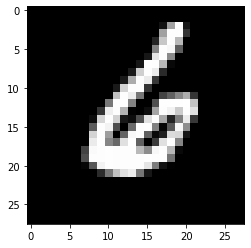

my predicted label 6
true label 6


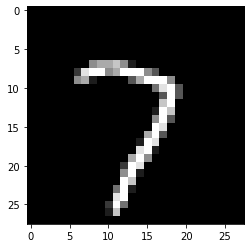

my predicted label 7
true label 7


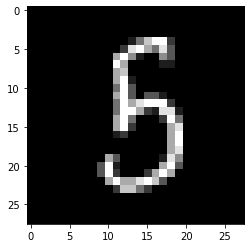

my predicted label 5
true label 5


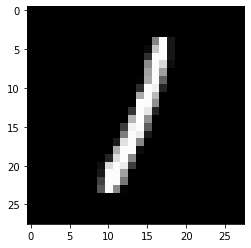

my predicted label 1
true label 1


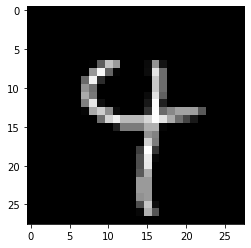

my predicted label 4
true label 4


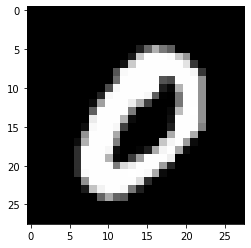

my predicted label 0
true label 0


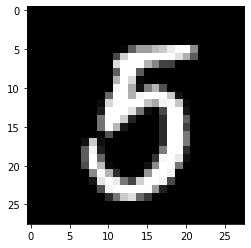

my predicted label 5
true label 5


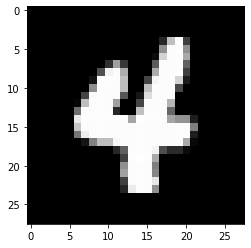

my predicted label 4
true label 4


In [19]:
for tp,tl in zip(ten_x_test,ten_y_test):
    pred=KNN(x_train,y_train,tp,5)
    
    image=tp.reshape(28,28)
    plt.imshow(image,cmap="gray")
    plt.show()
    
    print("my predicted label",pred)
    print("true label", tl)